# 🔖 TidyTuesday for Python

This dataset compiles TidyTuesday datasets from 2023-2024, aiming to make resources in the R community more accessible for Python users. The collection is a metadata in JSON structure including information such as date posted, project name, source, description, data dictionaries, data download URLs, and project post repo URLs.

## Example Use Cases

To explore the dataset, here are some sample use cases to better assist you in utilizing the data. Feel free to use them as your starting points and keep on digging for the hidden gems!

## **Load Dataset**

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import json
from tqdm.notebook import tqdm_notebook
import time
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# load dataset from huggingface
!pip install datasets -q
from datasets import load_dataset

dataset = load_dataset("hollyyfc/tidytuesday_for_python")

## **Example 1. Dataset Exploration & Retrieval**

The first thing you might want to figure out is the basic structure of the dataset. Apart from the information you get in `README`, here are some useful instances that you could check for data retrieval, formatting, and functionality.

Since the dataset is made into a JSON structure, the retrieval is fairly simple for Python users by indexing and direct slicing. You can always transform the massive thread of JSON instances to a neat dataframe for data manipulation and visualizations. And if some of the posts interest you, the actual datasets for that post are well-served and parsed into loadable URLs where you could easily inspect the contents!

### 1.1 Inspect Dataset & Structure

In [ ]:
next(iter(dataset['full']))

{'date_posted': '2023-01-03',
 'project_name': 'Week 1',
 'project_source': [],
 'description': 'This was really just a bring your own dataset week.',
 'data_source_url': 'https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-01-03',
 'data_dictionary': {'variable': ["['1']"],
  'class': ["['2023-01-03']"],
  'description': ["['Bring your own data from 2022!']"]},
 'data': {'file_name': [], 'file_url': []},
 'data_load': {'file_name': [], 'file_url': []}}

In [ ]:
dataset['full'][6]

{'date_posted': '2023-02-14',
 'project_name': 'Hollywood Age Gaps',
 'project_source': ['https://www.data-is-plural.com/archive/2018-02-07-edition/',
  'https://tidytues.day/2021/2021-03-09',
  'https://hollywoodagegap.com/'],
 'description': 'The data this week comes fromHollywood Age GapviaData Is Plural. An informational site showing the age gap between movie love interests. The data follows certain rules: The two (or more) actors play actual love interests (not just friends, coworkers, or some other non-romantic type of relationship) The youngest of the two actors is at least 17 years old Not animated characters We previously provided a dataset about theBechdel Test. It might be interesting to see whether there is any correlation between these datasets! The Bechdel Test dataset also included additional information about the films that were used in that dataset. Note: The age gaps dataset includes "gender" columns, which always contain the values "man" or "woman". These values appe

### 1.2 Type Transformation

* **JSON**

The dataset is loaded as a JSON structure, so there's no further step needed to transform it. Below shows some basic JSON operations, such as easy retrieval by labels.



In [ ]:
# retrieve by labels and slicing on full set
dataset['full']['project_name'][5:11]

['Big Tech Stock Prices',
 'Hollywood Age Gaps',
 'Bob Ross Paintings',
 'African Language Sentiment',
 'Numbats in Australia',
 'European Drug Development']

In [ ]:
# get particular information on train set
dataset['train']['description'][20]

"The data this week comes from Jared Wilber's data onBob Ross Paintingsvia @frankiethullBob Ross Colors data package. This is data from thepaintings of Bob Rossfeatured in the TV Show 'The Joy of Painting'. @frankiethull created an R data package{BobRossColors}with information on the palettes that leveraged imgpalr to mine divergent and qualitative colors from each painting image. In addition, unique Bob Ross named colors are in the package as well. In the github repository of the dataset, there are alsopngs of the paintingsthemselves! You might also want to check out ourprevious Bob Ross dataset from 2019-08-06to see if there are correlations between named objects and named colors!"

In [ ]:
# retrieve variable list of the first dataset in the 7th post
ast.literal_eval(dataset['full']['data_dictionary'][6]['variable'][0])

['movie_name',
 'release_year',
 'director',
 'age_difference',
 'couple_number',
 'actor_1_name',
 'actor_2_name',
 'character_1_gender',
 'character_2_gender',
 'actor_1_birthdate',
 'actor_2_birthdate',
 'actor_1_age',
 'actor_2_age']

In [ ]:
# retrieve the first loading url of the datasets in the 2nd post
dataset['full']['data_load'][1]['file_url'][0]

'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-10/PFW_2021_public.csv'

In [ ]:
# retrieve the instance with project name of "Big Tech Stock Prices"
next((item for item in dataset['full'] if item['project_name'] == 'Big Tech Stock Prices'), None)

{'date_posted': '2023-02-07',
 'project_name': 'Big Tech Stock Prices',
 'project_source': ['https://github.com/rfordatascience/tidytuesday/issues/509',
  'https://www.morningstar.com/articles/1129535/5-charts-on-big-tech-stocks-collapse',
  'https://www.kaggle.com/datasets/evangower/big-tech-stock-prices'],
 'description': 'The data this week comes from Yahoo Finance viaKaggle(byEvan Gower). This dataset consists of the daily stock prices and volume of 14 different tech companies, including Apple (AAPL), Amazon (AMZN), Alphabet (GOOGL), and Meta Platforms (META) and more! A number of articles have examined the collapse of "Big Tech" stock prices, includingthis article from morningstar.com. Note: Allstock_symbols have 3271 prices, except META (2688) and TSLA (3148) because they were not publicly traded for part of the period examined.',
 'data_source_url': 'https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-02-07',
 'data_dictionary': {'variable': ["['stock_symbo

* **Dataframe**

It's also easy to transform the JSON structure into a dataframe if you think it presents better analytical usage! The JSON structure is well labeled with careful considerations of users playing with dataframe / csv. Simply use `pd.DataFrame()` and you will get it in pandas dataframe structure!

In [ ]:
sample = pd.DataFrame(dataset['full'])
sample.head()

date_posted         project_name  \
0  2023-01-03               Week 1   
1  2023-01-10  Project FeederWatch   
2  2023-01-17          Art History   
3  2023-01-24                Alone   
4  2023-01-31          Pet Cats UK   

                                      project_source  \
0                                                 []   
1  [https://www.frontiersin.org/articles/10.3389/...   
2  [https://research.repository.duke.edu/concern/...   
3  [https://gradientdescending.com/alone-r-packag...   
4  [http://dx.doi.org/10.1111/acv.12563, https://...   

                                         description  \
0  This was really just a bring your own dataset ...   
1  The data this week comes from theProject Feede...   
2  The data this week comes from thearthistory da...   
3  The data this week comes from theAlone data pa...   
4  The data this week comes from theMovebank for ...   

                                     data_source_url  \
0  https://github.com/rfordatascience/tidytuesday...   
1  https://github.com/rfordatascience/tidytuesday...   
2  https://github.com/rfordatascience/tidytuesday...   
3  https://github.com/rfordatascience/tidytuesday...   
4  https://github.com/rfordatascience/tidytuesday...   

                                     data_dictionary  \
0  {'variable': ['['1']'], 'class': ['['2023-01-0...   
1  {'variable': ['['loc_id', 'latitude', 'longitu...   
2  {'variable': ['['artist_name', 'edition_number...   
3  {'variable': ['['season', 'name', 'age', 'gend...   
4  {'variable': ['['tag_id', 'event_id', 'visible...   

                                                data  \
0                  {'file_name': [], 'file_url': []}   
1  {'file_name': ['PFW_2021_public.csv', 'PFW_cou...   
2  {'file_name': ['artists.csv'], 'file_url': ['h...   
3  {'file_name': ['episodes.csv', 'loadouts.csv',...   
4  {'file_name': ['cats_uk.csv', 'cats_uk_referen...   

                                           data_load  
0                  {'file_name': [], 'file_url': []}  
1  {'file_name': ['PFW_2021_public.csv', 'PFW_cou...  
2  {'file_name': ['artists.csv'], 'file_url': ['h...  
3  {'file_name': ['episodes.csv', 'loadouts.csv',...  
4  {'file_name': ['cats_uk.csv', 'cats_uk_referen...

### 1.3 Easy Download!

Suppose that you are interested in one of the post with `project_name` as *Doctor Who Episodes* and want to actually load the data to do some analysis, you can directly load the dataset(s) through the URLs stored in `data_load`.

In [ ]:
drwho = next((item for item in dataset['full'] if item['project_name'] == 'Doctor Who Episodes'), None)
drwho_episodes_url = drwho['data_load']['file_url'][1]
drwho_episodes = pd.read_csv(drwho_episodes_url)
drwho_episodes.head()

era  season_number serial_title story_number  episode_number  \
0  revived            1.0          NaN          157             1.0   
1  revived            1.0          NaN          158             2.0   
2  revived            1.0          NaN          159             3.0   
3  revived            1.0          NaN         160a             4.0   
4  revived            1.0          NaN         160b             5.0   

          episode_title     type first_aired production_code  uk_viewers  \
0                  Rose  episode  2005-03-26             1.1       10.81   
1  The End of the World  episode  2005-04-02             1.2        7.97   
2      The Unquiet Dead  episode  2005-04-09             1.3        8.86   
3      Aliens of London  episode  2005-04-16             1.4        7.63   
4       World War Three  episode  2005-04-23             1.5        7.98   

   rating  duration  
0      76        45  
1      76        44  
2      80        44  
3      82        45  
4      81        42

## **Example 2. LDA Topic Analysis of Project Descriptions**

Previously, TidyTuesday posts weekly challenges on an individual basis. Participants are welcomed to select and join particular challenges based on clicking into each post and read through the descriptions. However, due to the separate nature of posts, it was difficult to efficiently get a general sense of the contents. Thus, one idea is to use LDA in topic modeling to grasp the essence of every project desctiptions.

* By year, we fit one general LDA on the grouped description text and output the top 5 topics with top 10 popular words used. This helps us gain the relevance and popularity among the word choices.

* By month, we fit individual LDA for each 4 or 5 posts within one month on descriptions and retrieve the commonly used words. These could help us gauge the relative importance of each month's post and inspect the themes (if there is any) per month.

Text output might be boring. Thus, wordclouds are also generated to aid the visual comprehension of posts.



In [ ]:
# load libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# convert dataset to dataframe
df = pd.DataFrame(dataset['full'])

# grab date and description columns
df_analysis = df[['date_posted', 'description']]

# create datetime variables - year & month
df_analysis['date_posted'] = pd.to_datetime(df_analysis['date_posted'])
df_analysis['year'] = df_analysis['date_posted'].dt.year
df_analysis['year_month'] = df_analysis['date_posted'].dt.to_period('M')

### 2.1 Top Project Themes Overall by Year

In [ ]:
# group descriptions by year
df_grouped_year = df_analysis.groupby('year')['description'].apply(' '.join).reset_index()

In [ ]:
# import LDA and vectorize descriptions
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
text_data = vectorizer.fit_transform(df_grouped_year['description'])

# fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(text_data)

LatentDirichletAllocation(n_components=5, random_state=0)

In [ ]:
# define a function to train and output topics
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}:")
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-top_n - 1:-1]])

In [ ]:
print_topics(lda, vectorizer)

Topic 1:
['data', 'dataset', 'day', 'csv', 'week', 'year', 'groundhog', 'explore', 'states', 'article']
Topic 2:
['release', 'office', 'spring', 'percentage', '70', 'come', 'goes', 'chance', 'center', 'teams']
Topic 3:
['release', 'office', 'spring', 'percentage', '70', 'come', 'goes', 'chance', 'center', 'teams']
Topic 4:
['data', 'dataset', 'week', 'comes', 'package', 'datasets', 'world', 'available', 'time', 'used']
Topic 5:
['release', 'office', 'spring', 'percentage', '70', 'come', 'goes', 'chance', 'center', 'teams']


### 2.2 Top Project Themes by Month

In [ ]:
# grab unique months
unique_months = df_analysis['year_month'].unique()

# define a function to print topics by month
def print_top_n_topics(model, vectorizer, top_n=3):
    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-top_n - 1:-1]
        top_features = [words[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        print(f"Topic {topic_idx + 1}: ", ", ".join(top_features))

# analyze by month
for month in unique_months:
    print(f"\n--- Top 3 Topics for {month} ---")
    month_data = df_analysis[df_analysis['year_month'] == month]
    descriptions = month_data['description'].tolist()

    # text processing
    vectorizer = CountVectorizer(stop_words='english', max_features=5000)
    text_data = vectorizer.fit_transform(descriptions)

    # fit LDA
    lda = LatentDirichletAllocation(n_components=3, random_state=0)
    lda.fit(text_data)

    # print top 3 topics for the month
    print_top_n_topics(lda, vectorizer)


--- Top 3 Topics for 2023-01 ---
Topic 1:  oehm, data, tv
Topic 2:  data, mcdonald, pet
Topic 3:  data, birds, feederwatch

--- Top 3 Topics for 2023-02 ---
Topic 1:  repository, comes, week
Topic 2:  dataset, data, age
Topic 3:  data, ross, colors

--- Top 3 Topics for 2023-03 ---
Topic 1:  time, data, zone
Topic 2:  data, week, comes
Topic 3:  comes, data, week

--- Top 3 Topics for 2023-04 ---
Topic 1:  data, dataset, egg
Topic 2:  cleaning, thank, analysis
Topic 3:  data, neolithic, wheat

--- Top 3 Topics for 2023-05 ---
Topic 1:  oldest, data, years
Topic 2:  version, weather, graphics
Topic 3:  data, dataset, study

--- Top 3 Topics for 2023-06 ---
Topic 1:  data, dataset, cleaning
Topic 2:  data, energy, world
Topic 3:  data, survey, dataset

--- Top 3 Topics for 2023-07 ---
Topic 1:  meteorological, temperature, surface
Topic 2:  detectors, gpt, native
Topic 3:  scurvy, lind, data

--- Top 3 Topics for 2023-08 ---
Topic 1:  hot, ones, evans
Topic 2:  data, package, refugees
T

### 2.3 Visualizations

In [ ]:
def generate_wordclouds(lda_model, feature_names):
    for topic_idx, topic in enumerate(lda_model.components_):
        word_scores = {word: score for word, score in zip(feature_names, topic)}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_idx + 1}')
        plt.show()

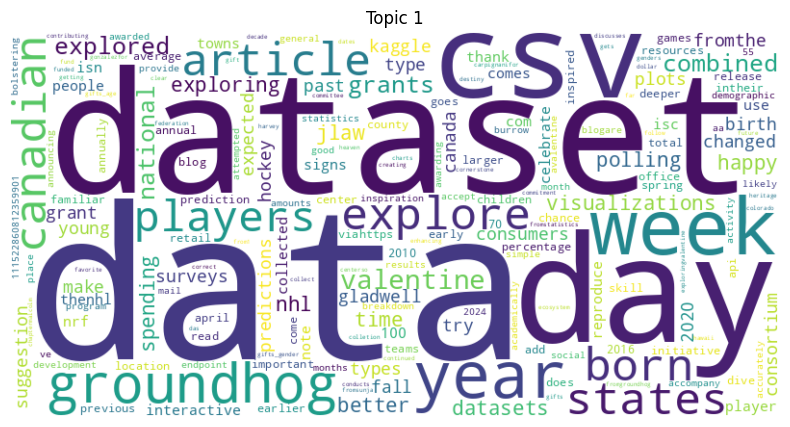

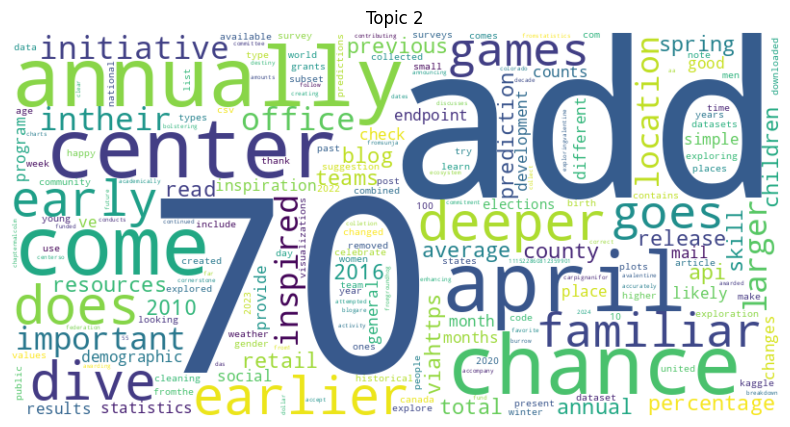

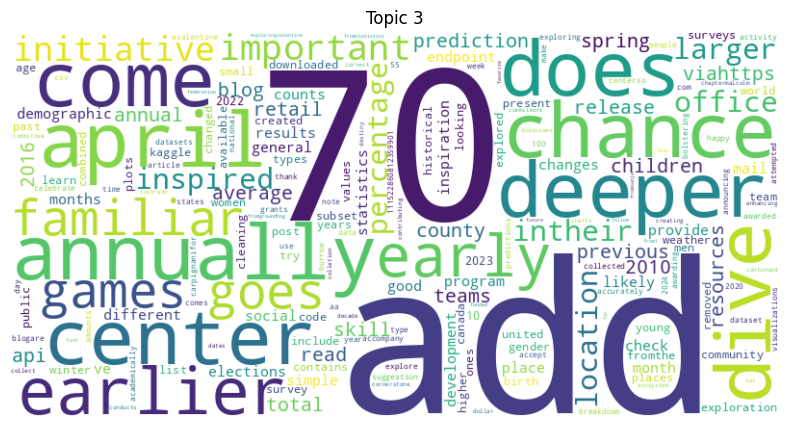

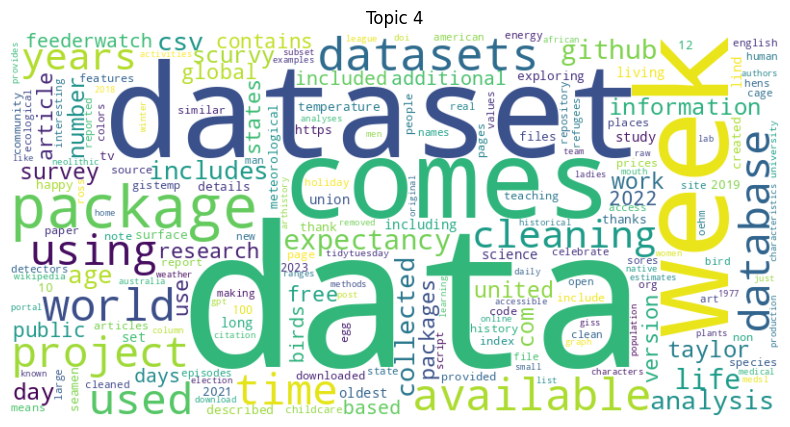

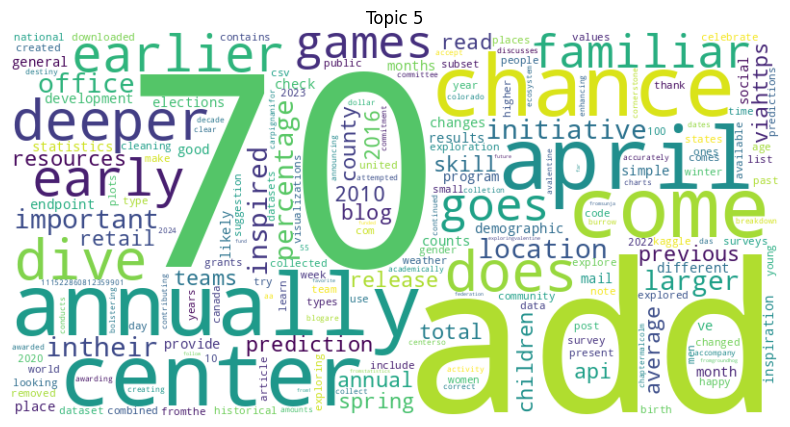

In [ ]:
feature_names = vectorizer.get_feature_names_out()
generate_wordclouds(lda, feature_names)

In [ ]:
df_grouped_month = df_analysis.groupby('year_month')['description'].apply(' '.join).reset_index()
vectorizer_month = CountVectorizer(stop_words='english', max_features=1000)
text_data_month = vectorizer_month.fit_transform(df_grouped_month['description'])

In [ ]:
lda_month = LatentDirichletAllocation(n_components=5, random_state=663)
lda_month.fit(text_data_month)

LatentDirichletAllocation(n_components=5, random_state=663)

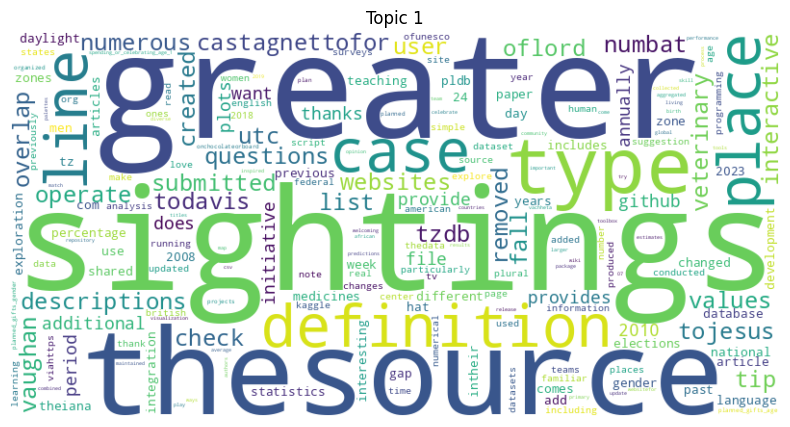

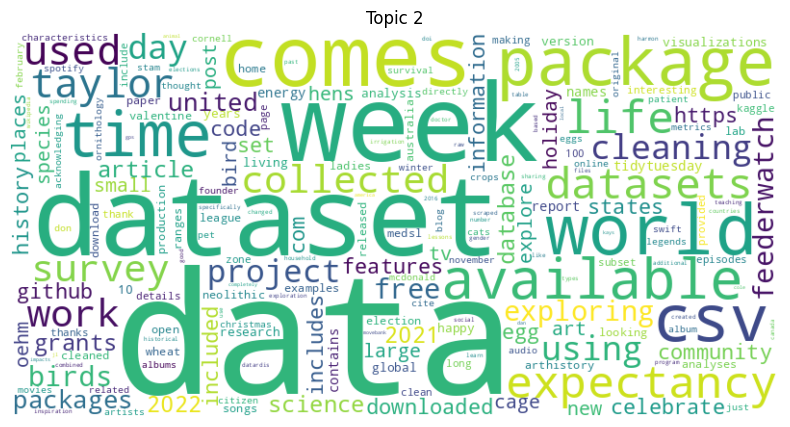

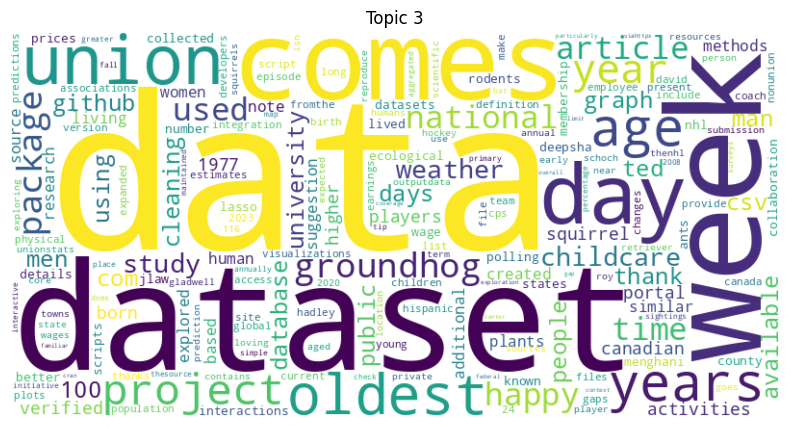

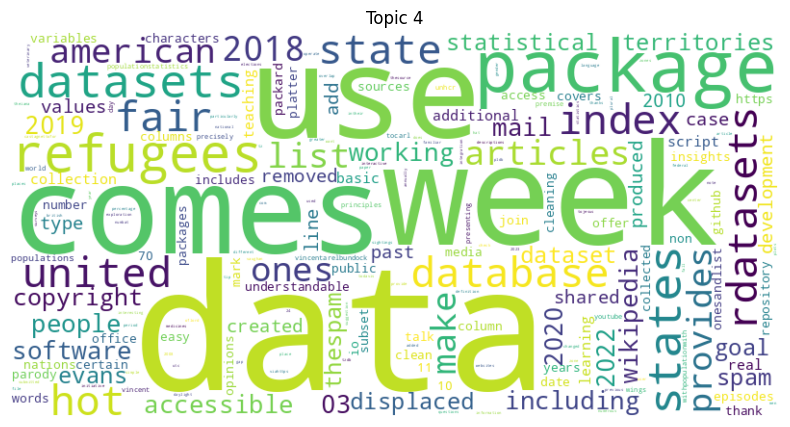

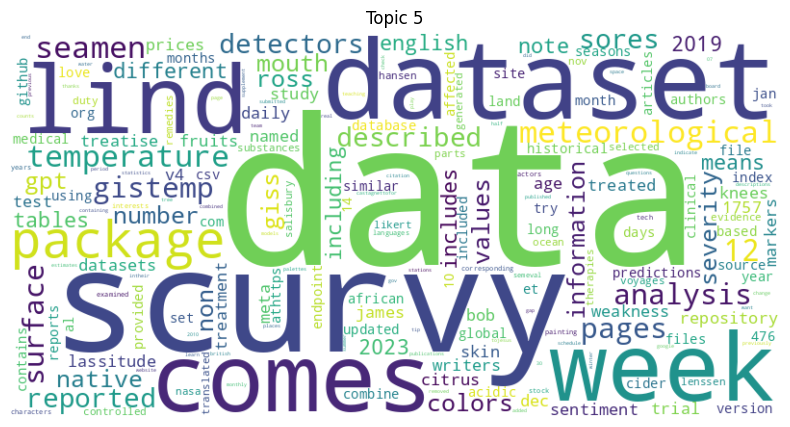

In [ ]:
feature_names_month = vectorizer_month.get_feature_names_out()
generate_wordclouds(lda_month, feature_names_month)

## **Example 3. Scoring System of Data Quality & Complexity**

Another interesting topic that we could explore is on the actual datasets associated with each post. From previous sections, we learn how to directly load the datasets from the URLs stored in `data_load` column. For sure, we could directly start playing around with the datasets based on the post requirements. However, our dataset, a generalized hub for these posts, could perform some comparative analysis as an extension rather than focusing on one single post each time.

Think of it as a game: when you just start exploring each level of a game, you might get a sense of what the theme is from reading the descriptions, but a marker for difficulty is crucial to your decision. The levels of "easy", "medium", and "hard" really affect your choice of the level based on your current status in the game. Thus, I managed to create a scoring function to evaluate each dataset for each post, generate a difficulty score based on the characteristics of the data, and categorize the scores into a `difficulty_level` variable. With the help of this glaring little marker, our data passionates will be able to gauge better before they choose the right option.



### 3.1 Scoring function

The scoring function consists of two parts:
* **complexity score**: calculated by taking the product of the number of rows and columns on a log-normal scale
* **missingness score**: calculated by the total number of NaN values divided by the total number of values (nrow * ncol)

Essentially, the size of the dataset is a key factor for deciding complexity. Without proper analysis on the actual data, size still remains a reliable indicator for how complex your data processing and manipulation might be. The missingness proportion is also always a thing we need to check before conducting data analysis. A dataset with more than 30% of missing values might require specific treatment and imputation. Thus, we generate the missingness score as a proxy to data quality.

Another important factor is the presence and proportion of outliers. My initial thought was to use the average standard deviation of all numeric-type variables in a dataset as a proxy to outliers. However, in a lot of cases, a high sd does not suggest the existence of outliers. And simply using the numeric variables is arbitrary in a sense that type encoding issues often get in the way (e.g., date / geo-location encoded as numbers). Moreover, even with the presence of outliers, it does not necessarily mean that the data has low quality. Therefore, we only stick to the above two scores.

In [ ]:
df2 = pd.DataFrame(dataset['full'])

In [ ]:
# define scoring function with complexity score and missingness score
def scoring_function(df):

  # complexity in term of size = row * col
  size_score = np.log1p(df.shape[0] * df.shape[1])
  # missingness in terms of number of NA / total
  missingness_score = df.isnull().sum().sum() / (df.shape[0] * df.shape[1])

  return size_score, missingness_score

### 3.2 Aggregate Function

After getting both scores for each dataset, we need to figure out how to pool the scores from multiple datasets under one post together:
* **complexity score**: instead of directly taking the average of multiple complexity scores, I decided to take the **maximum**, since usually we think a project is hard when one of the datasets has a relatively large size to process. Therefore, letting the other datasets' scores get in the way by taking the mean score might not sound intuitive.
* **missingness score**: however, when we think of data quality and missingness in general, we usually look across all datasets. One dataset with a high missingness does not mean that the overall data quality is low. Therefore, we take the **average**.

The function at this stage will output the two pooled scores for each post.

In [ ]:
# define aggregation function for multiple dataset post
def aggregate_scores(dataset_urls):

    # check if dataset_urls is empty
    if not dataset_urls:
        return None

    complexity_scores = []
    missingness_scores = []

    # loop through all datasets in one post
    for url in dataset_urls:
        try:
          df = pd.read_csv(url)
        except UnicodeDecodeError:
          df = pd.read_csv(url, encoding='unicode_escape')
        scores = scoring_function(df)
        complexity_scores.append(scores[0])
        missingness_scores.append(scores[1])

    # aggregate scores
    final_complexity = np.max(complexity_scores)
    final_missingness = np.mean(missingness_scores)

    return final_complexity, final_missingness

### 3.3 Run on All Dataframes

After running on all posts in our dataset with the scores calculated, we need to normalize the scale to 0 to 1 for better comparison. The final two lists of scores are stored as `complexity` and `missingness` in the original dataframe.

In [ ]:
# run function on all datasets
complexity = []
missingness = []

for dict_list in df2['data_load']:
  urls = dict_list['file_url']
  results = aggregate_scores(urls)
  if results is None:
    complexity.append(None)
    missingness.append(None)
  else:
    complexity.append(results[0])
    missingness.append(results[1])

In [ ]:
# normalization (escape None)
np_complexity = np.array(complexity, dtype=float)
np_missingness = np.array(missingness, dtype=float)

normalized_complexity = (np.array(np_complexity) - np.nanmin(np_complexity)) / (np.nanmax(np_complexity) - np.nanmin(np_complexity))
normalized_missingness = (np.array(np_missingness) - np.nanmin(np_missingness)) / (np.nanmax(np_missingness) - np.nanmin(np_missingness))

In [ ]:
# final scores
final_complexity = normalized_complexity.tolist()
final_missingness = normalized_missingness.tolist()

In [ ]:
# join back the original dataframe
df2['complexity'] = final_complexity
df2['missingness'] = final_missingness

### 3.4 Visualization

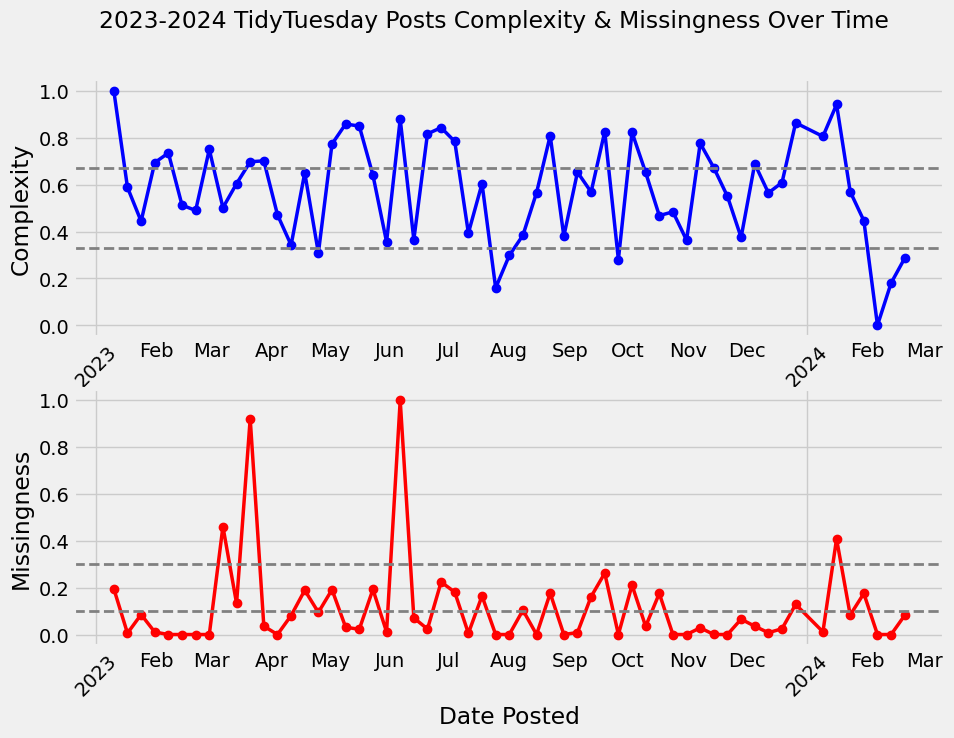

In [ ]:
# visualize
with plt.style.context(('fivethirtyeight')):
  fig = plt.figure(figsize=(10, 7))
  fig.suptitle('2023-2024 TidyTuesday Posts Complexity & Missingness Over Time')

  ax1 = fig.add_subplot(2, 1, 1)
  ax1.plot(df_analysis['date_posted'], df2['complexity'], marker='o', linestyle='-', color='b', linewidth = 2.5)
  ax1.axhline(y=0.67, color='grey', linestyle='--', linewidth = 2)
  ax1.axhline(y=0.33, color='grey', linestyle='--', linewidth = 2)
  ax1.set_xlabel('Date Posted')
  ax1.set_ylabel('Complexity')

  ax1.xaxis.set_major_locator(mdates.YearLocator())
  ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
  ax1.xaxis.set_minor_locator(mdates.MonthLocator())
  ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
  ax1.tick_params(axis='x', rotation=45)


  ax2 = fig.add_subplot(2, 1, 2)
  ax2.plot(df_analysis['date_posted'], df2['missingness'], marker='o', linestyle='-', color='r', linewidth = 2.5)
  ax2.axhline(y=0.1, color='grey', linestyle='--', linewidth = 2)
  ax2.axhline(y=0.3, color='grey', linestyle='--', linewidth = 2)
  ax2.set_ylabel('Missingness')
  ax2.set_xlabel('Date Posted')

  ax2.xaxis.set_major_locator(mdates.YearLocator())
  ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
  ax2.xaxis.set_minor_locator(mdates.MonthLocator())
  ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
  ax2.tick_params(axis='x', rotation=45)

plt.show()

### 3.5 Difficulty Score

The last step is to generate our difficulty label. As a sample use case, I simply took the average of `complexity` and `missingness` (both are normalized) as our `difficulty` score. The logic behind is that the difficulty of dealing with a project grows as the size of the data and the proportion of missing values increase. With the difficulty scores, visualization is conducted to aid our thresholding. The threshold selection process definitely need more considerations, but at this point, I selected manual cutoffs based on the distribution of difficulty scores as below:
* **Easy**: `difficulty` <= 0.2
* **Normal**: 0.2 < `difficulty` < 0.58
* **Hard**: `difficulty`>= 0.58

After categorization, save the levels into a new variable `difficulty_level` in the original dataframe. A visualization exploring the proportion of each difficulty level of TidyTuesday posts in 2023-2024 is also provided.

In [ ]:
# calculate difficulty score
df2['difficulty'] = (df2['complexity'] + df2['missingness'])/2

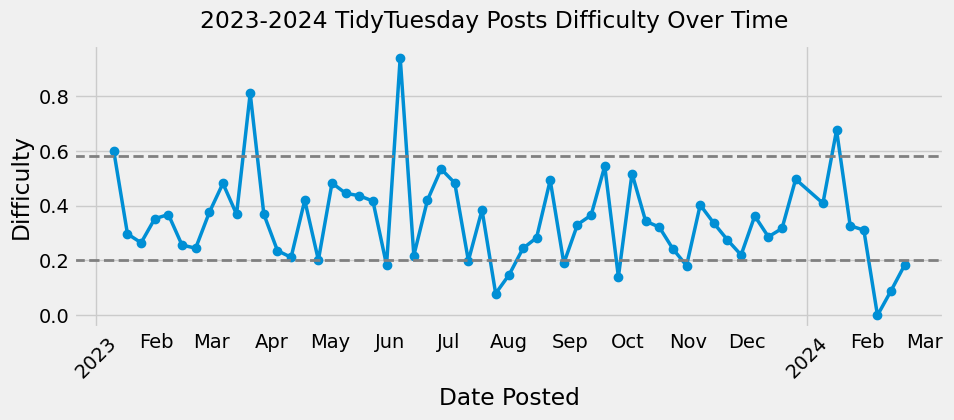

In [ ]:
# visualize
with plt.style.context(('fivethirtyeight')):
  fig = plt.figure(figsize=(10, 3.5))
  ax = fig.add_subplot(1, 1, 1)

  fig.suptitle('2023-2024 TidyTuesday Posts Difficulty Over Time')
  ax.plot(df_analysis['date_posted'], df2['difficulty'], marker='o', linestyle='-', linewidth = 2.5)
  ax.axhline(y=0.58, color='grey', linestyle='--', linewidth = 2)
  ax.axhline(y=0.2, color='grey', linestyle='--', linewidth = 2)
  ax.set_xlabel('Date Posted')
  ax.set_ylabel('Difficulty')

  ax.xaxis.set_major_locator(mdates.YearLocator())
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
  ax.xaxis.set_minor_locator(mdates.MonthLocator())
  ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
  ax.tick_params(axis='x', rotation=45)

plt.show()

In [ ]:
# add difficulty levels
conditions = [
    # Easy
    (df2['difficulty'] <= 0.2),
    # Normal
    (df2['difficulty'] > 0.2) & (df2['difficulty'] < 0.58),
    # Hard
    (df2['difficulty'] >= 0.58)
]
choices = ['Easy', 'Normal', 'Hard']
df2['difficulty_level'] = np.select(conditions, choices, default='None')

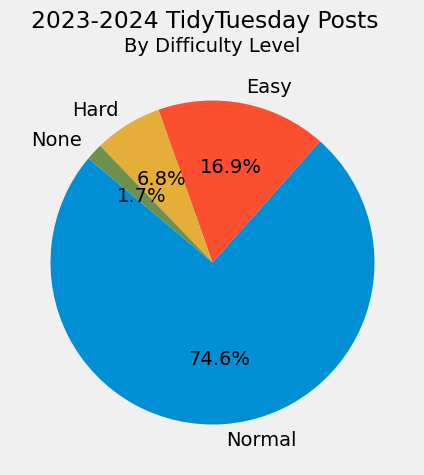

In [ ]:
difficulty_counts = df2['difficulty_level'].value_counts()
with plt.style.context(('fivethirtyeight')):
  plt.figure(figsize=(5, 5))
  plt.pie(difficulty_counts, labels=difficulty_counts.index, autopct='%1.1f%%', startangle=140)
  plt.suptitle('2023-2024 TidyTuesday Posts')
  plt.title('By Difficulty Level', fontsize=14)
plt.show()

## **Example 4. Clustering & Network Analysis of Post Relations**

With the scoring on `complexity`, `missingness`, and `difficulty` scores calculated from the actual datasets, we are able to conduct something more comprehensive. In Example 2, we explored topic modeling with LDA simply based on `description` and relative importance of words, since the tools are limited to text-only. Now, we can generalize the results using the most information from current variables to clustering and analyzing the network relations between posts.



### 4.1 K-Means Clustering

Specifically, we can conduct a K-means clustering based on the variable values and their similarity to each other to subgroup them into 4 clusters. The idea is to use all the information in the dataset so far. However, after adding the three scores, we have successfully engaged the details about the actual dataset, so some of the variables can be effectively removed to avoid correlation, such as `data_dictionary`, `data`, `data_load`, and `difficulty`, `difficulty_level` (because they are calculated from the average of `complexity` and `missingness`). Moreover, irrelevant information such as `date_posted`, `project_source` and `data_source_url` can be removed.

Since K-means only takes numeric values, we need to figure out a way to combine the remaining three variables: `description`, `complexity`, and `missingness`:
* `description`: change strings of characters into text embeddings using the transformers model, which output a numpy array of 512 dimensions.
* `complexity` and `missingness`: concatanate the two numeric values to the numpy array by post.

The resulting variable is a stack of numpy arrays of dimension 514. From there, we can fit our K-means and generate the labels for each post. If the users find solving one challenge interesting, they can refer to other posts with the cluster label bearing the same type!

In [ ]:
from transformers import DistilBertModel, DistilBertTokenizer
import torch
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

In [ ]:
# specify models
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

In [ ]:
# define a function for embeddings
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

In [ ]:
# get key variables
df4 = df2.copy()
df4 = df4.drop(['project_source', 'data_source_url', 'data_dictionary', 'data', 'data_load', 'difficulty', 'difficulty_level'], axis = 1)

In [ ]:
# generate embeddings for descriptions
embeddings = df4['description'].apply(lambda x: get_embedding(x)[0])

In [ ]:
df4_embeddings = df4.drop(["date_posted", "project_name", "description"], axis = 1)

In [ ]:
# concatenate embeddings
numeric_data = df4_embeddings[['complexity', 'missingness']].values
combined_features = np.array([np.concatenate([embeddings[i], numeric_data[i]]) for i in range(len(embeddings))])
clean_combined_features = np.nan_to_num(combined_features, nan=0.0)

In [ ]:
# kmeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(np.vstack(clean_combined_features))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
# yield predicted cluster labels
df4['cluster_label'] = kmeans.labels_

In [ ]:
df4.head(10)

date_posted                project_name  \
0  2023-01-03                      Week 1   
1  2023-01-10         Project FeederWatch   
2  2023-01-17                 Art History   
3  2023-01-24                       Alone   
4  2023-01-31                 Pet Cats UK   
5  2023-02-07       Big Tech Stock Prices   
6  2023-02-14          Hollywood Age Gaps   
7  2023-02-21          Bob Ross Paintings   
8  2023-02-28  African Language Sentiment   
9  2023-03-07        Numbats in Australia   

                                         description  complexity  missingness  \
0  This was really just a bring your own dataset ...         NaN          NaN   
1  The data this week comes from theProject Feede...    1.000000     0.195057   
2  The data this week comes from thearthistory da...    0.588286     0.005615   
3  The data this week comes from theAlone data pa...    0.443922     0.085398   
4  The data this week comes from theMovebank for ...    0.694085     0.010530   
5  The data this week comes from Yahoo Finance vi...    0.735282     0.000000   
6  The data this week comes fromHollywood Age Gap...    0.512527     0.000000   
7  The data this week comes from Jared Wilber's d...    0.489963     0.000000   
8  The data this week comes fromAfriSenti: Sentim...    0.750293     0.000000   
9  The data this week comes from theAtlas of Livi...    0.501780     0.460556   

   cluster_label  
0              0  
1              1  
2              1  
3              1  
4              1  
5              2  
6              1  
7              3  
8              3  
9              3

### 4.2 Network Modeling

After K-means yielding the label output, we might also want to see how strong the relationships are. Therefore, a network visualization is a good way to inspect post relations with nodes being the posts and edges being the strong relations. Feeding the embeddings again, now we choose a cosine similarity to measure the distance across posts. Then, a manual threshold of similarity is chosen around 0.9 to visualize the clustering and internconnectivity between posts. The final plot shows that most posts in each cluster have a strong similarity with each other (especially Cluster 3), while some posts in Cluster 0 and 1 are left singletons. Examining in the context of each post, the resulting plot in fact is reasonable.

In [ ]:
# generate a cosine similarity matrix
similarity_matrix = cosine_similarity(clean_combined_features)

In [ ]:
np.mean(similarity_matrix)

0.8861928322013859

In [ ]:
G = nx.Graph()
# Add nodes
for i in range(len(df4)):
    G.add_node(i, label=df4.iloc[i]['date_posted'], cluster=df4.iloc[i]['cluster_label'])

# Add edges based on similarity threshold, for example, 0.8
threshold = 0.91
for i in range(len(similarity_matrix)):
    for j in range(i+1, len(similarity_matrix)):
        if similarity_matrix[i, j] > threshold:
            G.add_edge(i, j)

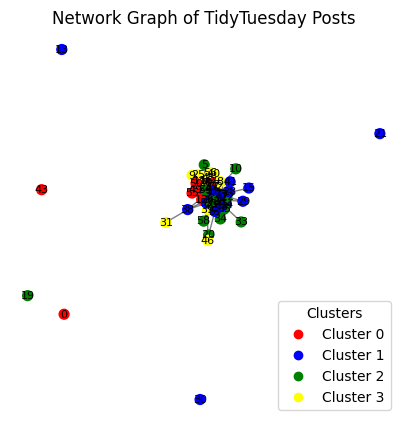

In [ ]:
# visualize
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)  # Node positions
color_map = {0: 'r', 1: 'b', 2: 'green', 3: 'yellow'}
nx.draw_networkx_nodes(G, pos, node_color=[color_map[label] for label in df4['cluster_label']], node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Network Graph of TidyTuesday Posts')
plt.axis('off')

unique_clusters = set(df4['cluster_label'])
legend_elements = [plt.Line2D([0], [0], marker='o', color=color_map[cluster], lw=0, label=f'Cluster {cluster}')
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title='Clusters')

plt.show()